In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import permutation_importance

from google.colab import files
filenya = files.upload()

Saving heart.csv to heart.csv


In [ ]:
filenya

{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [ ]:
df_d = pd.read_csv('heart.csv')
pd.set_option('display.max_columns', None)
df_d.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df_d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
def data_check(df_d) :
    missing = df_d.isnull().sum()
    return pd.DataFrame({"Missing" : missing})
data_check(df_d)

,Missing
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df_d.duplicated().sum()

723

In [ ]:
df_d.drop_duplicates(inplace = True)
df_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'target')])

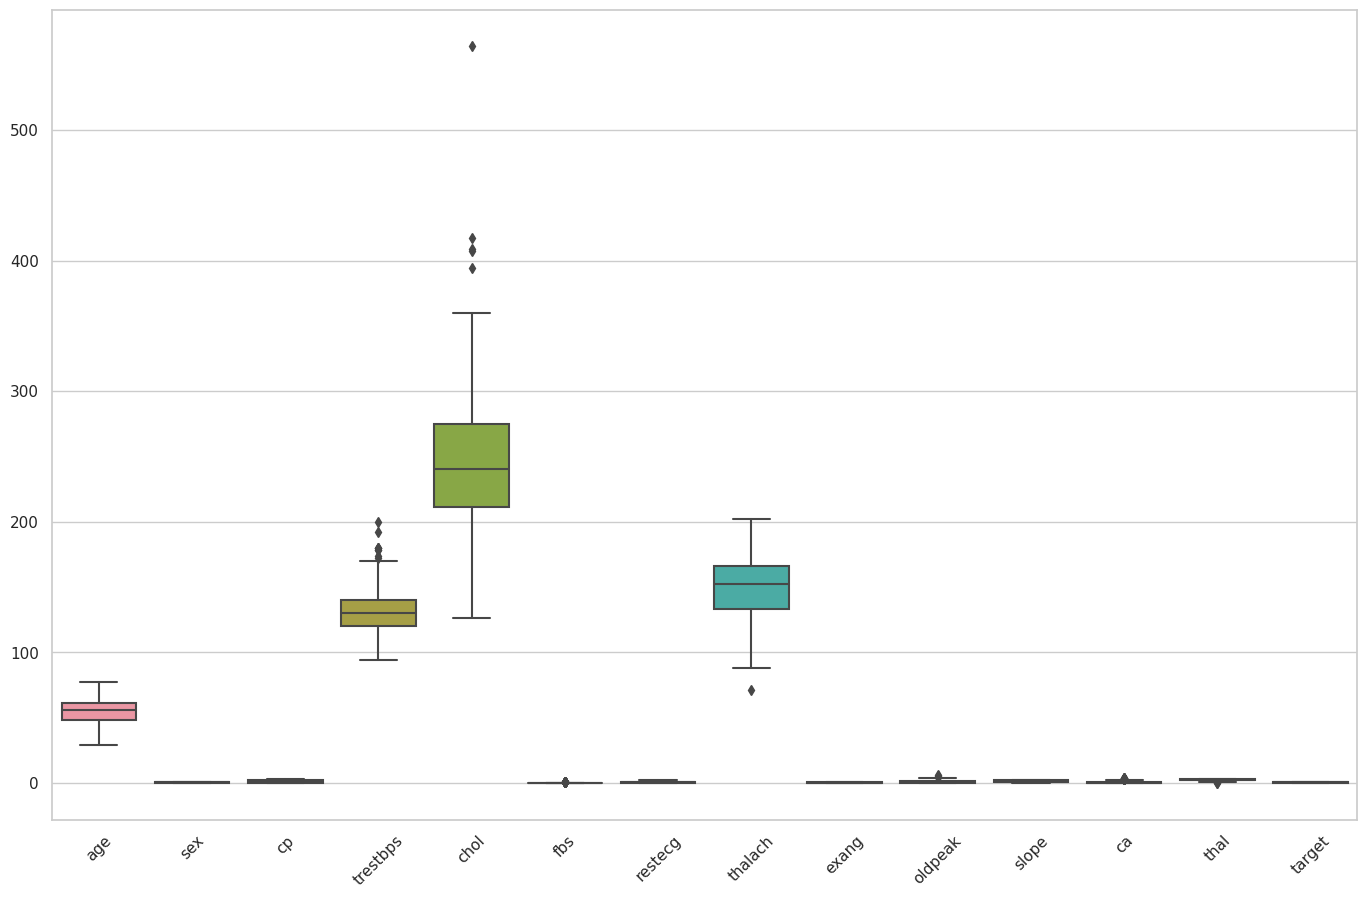

In [ ]:
#Check Outliers
sns.set(style="whitegrid", palette="colorblind")
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df_d)
plt.xticks(rotation=45)

In [ ]:
# Menampilkan
plt.show()

In [ ]:
#there's no outlier

In [ ]:
class_distribution = df_d['age'].value_counts()
print(class_distribution)

58    19
57    17
54    16
59    14
52    13
51    12
44    11
60    11
56    11
62    11
41    10
64    10
67     9
63     9
42     8
43     8
65     8
53     8
61     8
45     8
55     8
50     7
46     7
66     7
48     7
49     5
47     5
68     4
70     4
35     4
39     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
77     1
74     1
Name: age, dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_d.drop('age', axis=1), df_d['age'], test_size=0.25, random_state=42)

In [ ]:
# Check if the training data is imbalanced
training_class_distribution = y_train.value_counts()
print(training_class_distribution)

57    13
58    13
52    11
54    11
51    10
59     9
56     9
41     9
60     9
64     8
67     8
42     7
55     7
53     7
65     6
62     6
44     6
45     6
61     6
43     6
46     5
63     5
48     5
49     5
50     4
39     4
70     3
35     3
71     3
69     3
68     3
66     3
38     2
37     2
47     2
34     2
40     2
74     1
76     1
77     1
Name: age, dtype: int64


In [ ]:
df_d['target'] = df_d['target'].replace({0: 'No disease',
                                         1: 'Disease'})

<Axes: >

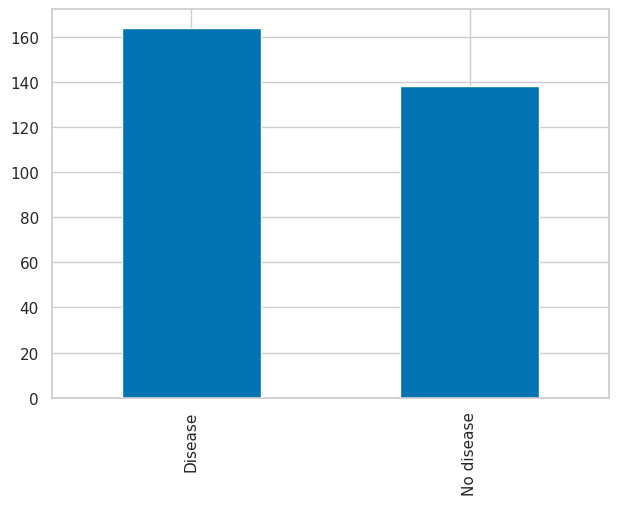

In [ ]:
df_d['target'].value_counts().plot(kind = 'bar')

In [ ]:
#dataset already balanced

In [ ]:
#Feature Engineering

In [ ]:
# 1. Kategori Tekanan Darah
df_d['trestbps'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [ ]:
def segment(type):
    if type <= 130 :
        return 'Normal'
    elif type > 131 and type < 139 :
        return 'Normal Tinggi'
    elif type >= 140 :
        return 'Tingkat Tinggi'

In [ ]:
df_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,No disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,No disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,Disease
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,Disease
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,No disease
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,No disease


In [ ]:
# Menggunakan fungsi categorize_bps untuk membuat kolom "Status Tekanan Darah"
df_d["Status Tekanan Darah"] = df_d["trestbps"].apply(segment)

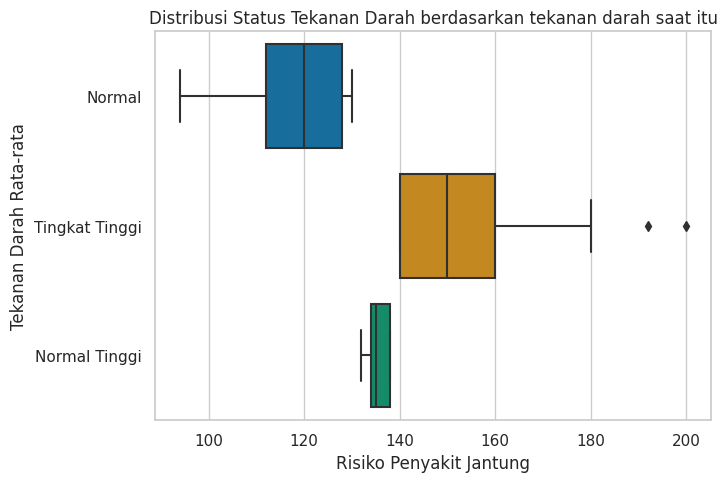

In [ ]:
# Visualisasi distribusi tekanan darah
sns.boxplot(data=df_d, x="trestbps", y="Status Tekanan Darah")
plt.xlabel("Risiko Penyakit Jantung")
plt.ylabel("Tekanan Darah Rata-rata")
plt.title("Distribusi Status Tekanan Darah berdasarkan tekanan darah saat itu")
plt.show()

In [ ]:
# 2. Kandungan Gula Darah
df_d['fbs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 302 entries, 0 to 878
Series name: fbs
Non-Null Count  Dtype
--------------  -----
302 non-null    int64
dtypes: int64(1)
memory usage: 4.7 KB


In [ ]:
df_d['fbs'].describe()

count    302.000000
mean       0.149007
std        0.356686
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
def d_fbs(type):
    if type == 1 :
        return 'Normal'
    elif type == 0 :
        return 'Diabetes'

In [ ]:
df_fbs = df_d['fbs_category'] = df_d['fbs'].apply(d_fbs)

In [ ]:
df_fbs

0      Diabetes
1        Normal
2      Diabetes
3      Diabetes
4        Normal
         ...   
723    Diabetes
733    Diabetes
739    Diabetes
843    Diabetes
878    Diabetes
Name: fbs, Length: 302, dtype: object

In [ ]:
# 3. Kategori Colesterol
df_d['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

In [ ]:
def segment_chol(type):
    if type <= 200 :
        return 'desirable'
    elif type > 200 and type < 239 :
        return 'borderline high'
    elif type >= 239 :
        return 'high'

In [ ]:
df_chol = df_d['chol_status'] = df_d['chol'].apply(segment_chol)

In [ ]:
df_chol
df_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Tekanan Darah,fbs_category,chol_status
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,No disease,Normal,Diabetes,borderline high
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No disease,Tingkat Tinggi,Normal,borderline high
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,No disease,Tingkat Tinggi,Diabetes,desirable
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No disease,Tingkat Tinggi,Diabetes,borderline high
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No disease,Normal Tinggi,Normal,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,Disease,Normal,Diabetes,borderline high
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,Disease,Normal,Diabetes,desirable
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,No disease,Normal,Diabetes,high
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,No disease,Tingkat Tinggi,Diabetes,high


In [ ]:
# 4. Detak Jantung Normal Berdasarkan Usia
df_d['thalach'].describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [ ]:
# Buat function untuk menghitung apakah detak jantung normal
def is_heart_rate_normal(age, thalach):
  """Menghitung apakah detak jantung seseorang berdasarkan usianya normal.

  Args:
    age: Usia seseorang dalam tahun.
    heart_rate: Detak jantung seseorang dalam BPM.

  Returns:
    True jika detak jantung normal, False jika tidak normal.
  """

  # Batas detak jantung normal berdasarkan usia
  lower_limit = 220 - age
  upper_limit = 220 - age / 2

  if lower_limit <= thalach <= upper_limit:
    return True
  else:
    return False

# Hitung apakah detak jantung normal untuk setiap baris di DataFrame
df_d['detak_jantung_normal'] = df_d.apply(lambda row: is_heart_rate_normal(row['age'], row['thalach']), axis=1)

# Cetak DataFrame
print(df_d)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal      target Status Tekanan Darah fbs_category  \
0        2   2   

In [ ]:
# 5. Membuat kategori umur untuk memprediksi risiko penyakit jantung
# Fungsi untuk mengkategorikan umur
def categorize_age(age):
    if age < 35:
        return "Dewasa Muda"
    elif age >= 35 and age <= 60:
        return "Dewasa"
    else:
        return "Lansia"


In [ ]:
# Menggunakan fungsi categorize_age untuk membuat kolom "Umur Kategori"
df_d["Kelompok Umur"] = df_d["age"].apply(categorize_age)

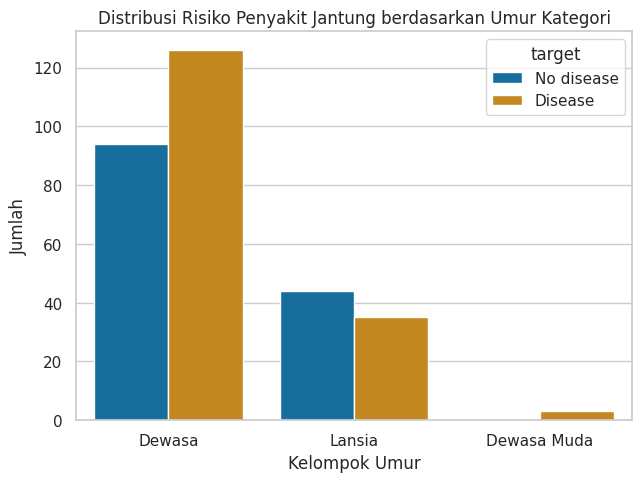

In [ ]:
# Visualisasi distribusi risiko penyakit jantung berdasarkan Umur Kategori
sns.countplot(data=df_d, x="Kelompok Umur", hue="target")
plt.xlabel("Kelompok Umur")
plt.ylabel("Jumlah")
plt.title("Distribusi Risiko Penyakit Jantung berdasarkan Umur Kategori")
plt.show()

In [ ]:
# 6. Menghitung Ratio Kolesterol  dan risiko penyakit jantung
# agar dapat menghitung rasio kolesterol dengan membagi "cholesterol" oleh "thalach"
# (denyut jantung maksimal) sebagai indikator potensial risiko penyakit jantung

df_d["Ratio Kolesterol"] = df_d["chol"] / df_d["thalach"]

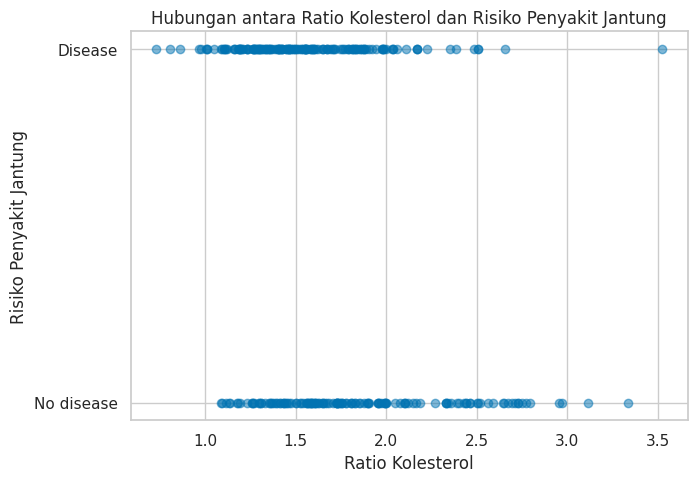

In [ ]:
# Visualisasi hubungan antara Ratio Kolesterol dan risiko penyakit jantung
plt.scatter(df_d["Ratio Kolesterol"], df_d["target"], alpha=0.5)
plt.xlabel("Ratio Kolesterol")
plt.ylabel("Risiko Penyakit Jantung")
plt.title("Hubungan antara Ratio Kolesterol dan Risiko Penyakit Jantung")
plt.show()

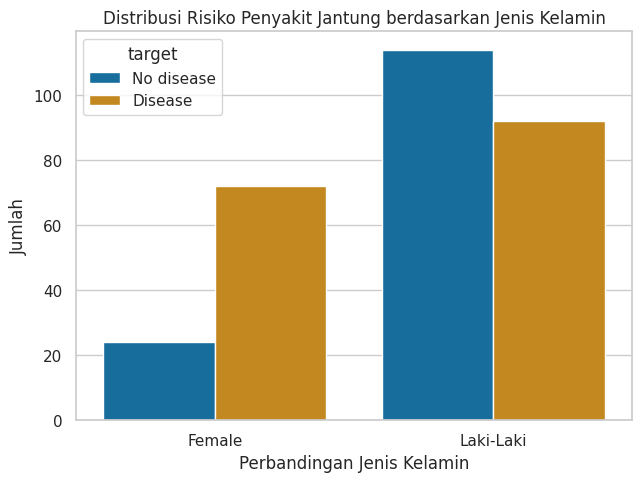

In [ ]:
# 7. Perbandingan Jenis kelamin
df_d["Perbandingan Jenis Kelamin"] = df_d["sex"].map({0: 0, 1: 1})

# Visualisasi hubungan antara Perbandingan Jenis Kelamin dan risiko penyakit jantung
sns.countplot(data=df_d, x="Perbandingan Jenis Kelamin", hue="target")
plt.xlabel("Perbandingan Jenis Kelamin")
plt.ylabel("Jumlah")
plt.title("Distribusi Risiko Penyakit Jantung berdasarkan Jenis Kelamin")
plt.xticks([0, 1], ["Female", "Laki-Laki"])
plt.show()

In [ ]:
#8. Rata-rata tekanan darah terhadap usia
df_d['rata_rata_tekanan_darah_thdp_usia'] = df_d['trestbps'] / df_d['age']
df_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Tekanan Darah,fbs_category,chol_status,detak_jantung_normal,Kelompok Umur,Ratio Kolesterol,Perbandingan Jenis Kelamin,rata_rata_tekanan_darah_thdp_usia
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,No disease,Normal,Diabetes,borderline high,True,Dewasa,1.261905,1,2.403846
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,No disease,Tingkat Tinggi,Normal,borderline high,False,Dewasa,1.309677,1,2.641509
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,No disease,Tingkat Tinggi,Diabetes,desirable,False,Lansia,1.392000,1,2.071429
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,No disease,Tingkat Tinggi,Diabetes,borderline high,True,Lansia,1.260870,1,2.426230
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,No disease,Normal Tinggi,Normal,high,False,Lansia,2.773585,0,2.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,Disease,Normal,Diabetes,borderline high,False,Lansia,1.834783,0,1.764706
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,Disease,Normal,Diabetes,desirable,False,Dewasa,0.805714,0,2.454545
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,No disease,Normal,Diabetes,high,False,Dewasa,1.583851,1,2.461538
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,No disease,Tingkat Tinggi,Diabetes,high,False,Dewasa,2.184000,1,2.711864


In [ ]:
# 9.
df_d['cp'].describe()
df_d['cp'] = df_d['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
df_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Tekanan Darah,fbs_category,chol_status,detak_jantung_normal,Kelompok Umur,Ratio Kolesterol,Perbandingan Jenis Kelamin,rata_rata_tekanan_darah_thdp_usia
0,52,1,typical angina,125,212,0,1,168,0,1.0,2,2,3,No disease,Normal,Diabetes,borderline high,True,Dewasa,1.261905,1,2.403846
1,53,1,typical angina,140,203,1,0,155,1,3.1,0,0,3,No disease,Tingkat Tinggi,Normal,borderline high,False,Dewasa,1.309677,1,2.641509
2,70,1,typical angina,145,174,0,1,125,1,2.6,0,0,3,No disease,Tingkat Tinggi,Diabetes,desirable,False,Lansia,1.392000,1,2.071429
3,61,1,typical angina,148,203,0,1,161,0,0.0,2,1,3,No disease,Tingkat Tinggi,Diabetes,borderline high,True,Lansia,1.260870,1,2.426230
4,62,0,typical angina,138,294,1,1,106,0,1.9,1,3,2,No disease,Normal Tinggi,Normal,high,False,Lansia,2.773585,0,2.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,non-anginal pain,120,211,0,0,115,0,1.5,1,0,2,Disease,Normal,Diabetes,borderline high,False,Lansia,1.834783,0,1.764706
733,44,0,non-anginal pain,108,141,0,1,175,0,0.6,1,0,2,Disease,Normal,Diabetes,desirable,False,Dewasa,0.805714,0,2.454545
739,52,1,typical angina,128,255,0,1,161,1,0.0,2,1,3,No disease,Normal,Diabetes,high,False,Dewasa,1.583851,1,2.461538
843,59,1,asymtomatic,160,273,0,0,125,0,0.0,2,0,2,No disease,Tingkat Tinggi,Diabetes,high,False,Dewasa,2.184000,1,2.711864


Text(0.5, 1.0, 'Distribusi Usia Pasien Rumah Sakit')

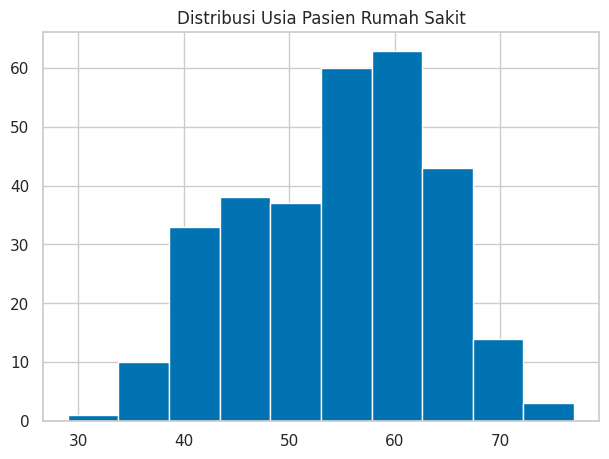

In [ ]:
#Melihat distribusi data usia
df_d['age'].hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien Rumah Sakit')

In [ ]:
df_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Tekanan Darah,fbs_category,chol_status,detak_jantung_normal,Kelompok Umur,Ratio Kolesterol,Perbandingan Jenis Kelamin,rata_rata_tekanan_darah_thdp_usia
0,52,1,typical angina,125,212,0,1,168,0,1.0,2,2,3,No disease,Normal,Diabetes,borderline high,True,Dewasa,1.261905,1,2.403846
1,53,1,typical angina,140,203,1,0,155,1,3.1,0,0,3,No disease,Tingkat Tinggi,Normal,borderline high,False,Dewasa,1.309677,1,2.641509
2,70,1,typical angina,145,174,0,1,125,1,2.6,0,0,3,No disease,Tingkat Tinggi,Diabetes,desirable,False,Lansia,1.392000,1,2.071429
3,61,1,typical angina,148,203,0,1,161,0,0.0,2,1,3,No disease,Tingkat Tinggi,Diabetes,borderline high,True,Lansia,1.260870,1,2.426230
4,62,0,typical angina,138,294,1,1,106,0,1.9,1,3,2,No disease,Normal Tinggi,Normal,high,False,Lansia,2.773585,0,2.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,non-anginal pain,120,211,0,0,115,0,1.5,1,0,2,Disease,Normal,Diabetes,borderline high,False,Lansia,1.834783,0,1.764706
733,44,0,non-anginal pain,108,141,0,1,175,0,0.6,1,0,2,Disease,Normal,Diabetes,desirable,False,Dewasa,0.805714,0,2.454545
739,52,1,typical angina,128,255,0,1,161,1,0.0,2,1,3,No disease,Normal,Diabetes,high,False,Dewasa,1.583851,1,2.461538
843,59,1,asymtomatic,160,273,0,0,125,0,0.0,2,0,2,No disease,Tingkat Tinggi,Diabetes,high,False,Dewasa,2.184000,1,2.711864


Text(0.5, 1.0, 'Distribusi Tingkat Stres Pasien Rumah Sakit')

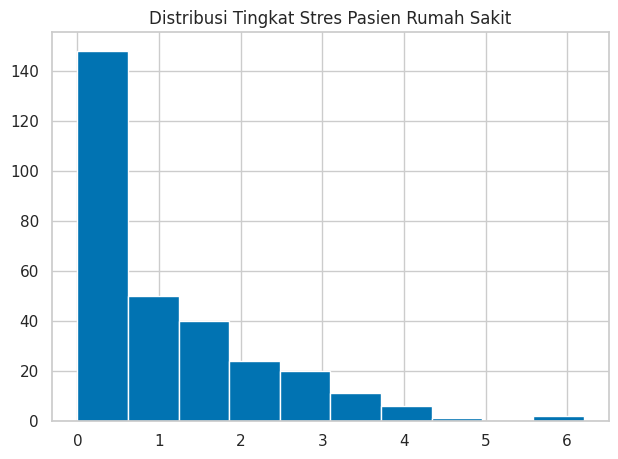

In [ ]:
#Melihat distribusi data tingkat despresi/stres pasien
df_d['oldpeak'].hist().plot(kind='bar')
plt.title('Distribusi Tingkat Stres Pasien Rumah Sakit')

In [ ]:
df_d['Kelompok Umur'].value_counts()

Dewasa         220
Lansia          79
Dewasa Muda      3
Name: Kelompok Umur, dtype: int64

In [ ]:
fbs_map = {'Diabetes': 1, 'Normal' : 0}
cp_map = {'typical angina': 3, 'non-anginal pain' : 2, 'atypical angina': 1, 'asymtomatic': 0}
target_map = {'Disease': 1, 'No disease': 0}
status_tekanan_darah_map = {'Normal': 2, 'Tingkat Tinggi': 1, 'Normal Tinggi': 0}
chol_status_map = {'high': 2, 'borderline high': 1, 'desirable': 0}
# detak_jantung_map = {'True': 1, 'False': 0}
kelompok_umur_map = {'Dewasa': 2, 'Lansia': 1, 'Dewasa Muda': 0}

In [ ]:
df_d['fbs_category'] = df_d['fbs_category'].map(fbs_map)
df_d['cp'] = df_d['cp'].map(cp_map)
df_d['target'] = df_d['target'].map(target_map)
df_d['Status Tekanan Darah'] = df_d['Status Tekanan Darah'].map(status_tekanan_darah_map)
df_d['chol_status'] = df_d['chol_status'].map(chol_status_map)
# df_d['detak_jantung_normal'] = df_d['detak_jantung_normal'].map(detak_jantung_map)
df_d['Kelompok Umur'] = df_d['Kelompok Umur'].map(kelompok_umur_map)

In [ ]:
df_d['detak_jantung_normal'].replace(True, 1, inplace=True)
df_d['detak_jantung_normal'].replace(False, 0, inplace=True)

In [ ]:
categorical_cols = df_d.select_dtypes(include='object').columns.tolist()
categorical_cols

[]

In [ ]:
continues_cols = df_d.select_dtypes(include='number').columns.tolist()
continues_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target',
 'Status Tekanan Darah',
 'fbs_category',
 'chol_status',
 'detak_jantung_normal',
 'Kelompok Umur',
 'Ratio Kolesterol',
 'Perbandingan Jenis Kelamin',
 'rata_rata_tekanan_darah_thdp_usia']

In [ ]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                302 non-null    int64  
 1   sex                                302 non-null    int64  
 2   cp                                 302 non-null    int64  
 3   trestbps                           302 non-null    int64  
 4   chol                               302 non-null    int64  
 5   fbs                                302 non-null    int64  
 6   restecg                            302 non-null    int64  
 7   thalach                            302 non-null    int64  
 8   exang                              302 non-null    int64  
 9   oldpeak                            302 non-null    float64
 10  slope                              302 non-null    int64  
 11  ca                                 302 non-null    int64  

In [ ]:
df_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Status Tekanan Darah,fbs_category,chol_status,detak_jantung_normal,Kelompok Umur,Ratio Kolesterol,Perbandingan Jenis Kelamin,rata_rata_tekanan_darah_thdp_usia
0,52,1,3,125,212,0,1,168,0,1.0,2,2,3,0,2,1,1,1,2,1.261905,1,2.403846
1,53,1,3,140,203,1,0,155,1,3.1,0,0,3,0,1,0,1,0,2,1.309677,1,2.641509
2,70,1,3,145,174,0,1,125,1,2.6,0,0,3,0,1,1,0,0,1,1.392000,1,2.071429
3,61,1,3,148,203,0,1,161,0,0.0,2,1,3,0,1,1,1,1,1,1.260870,1,2.426230
4,62,0,3,138,294,1,1,106,0,1.9,1,3,2,0,0,0,2,0,1,2.773585,0,2.225806


In [ ]:
# Memisahkan data menjadi features dan target
X = df_d.drop("target", axis=1)
y = df_d["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Status Tekanan Darah,fbs_category,chol_status,detak_jantung_normal,Kelompok Umur,Ratio Kolesterol,Perbandingan Jenis Kelamin,rata_rata_tekanan_darah_thdp_usia
0,52,1,3,125,212,0,1,168,0,1.0,2,2,3,2,1,1,1,2,1.261905,1,2.403846
1,53,1,3,140,203,1,0,155,1,3.1,0,0,3,1,0,1,0,2,1.309677,1,2.641509
2,70,1,3,145,174,0,1,125,1,2.6,0,0,3,1,1,0,0,1,1.392000,1,2.071429
3,61,1,3,148,203,0,1,161,0,0.0,2,1,3,1,1,1,1,1,1.260870,1,2.426230
4,62,0,3,138,294,1,1,106,0,1.9,1,3,2,0,0,2,0,1,2.773585,0,2.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,2,1,1,0,1,1.834783,0,1.764706
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,2,1,0,0,2,0.805714,0,2.454545
739,52,1,3,128,255,0,1,161,1,0.0,2,1,3,2,1,2,0,2,1.583851,1,2.461538
843,59,1,0,160,273,0,0,125,0,0.0,2,0,2,1,1,2,0,2,2.184000,1,2.711864


In [ ]:
# Scaling numeric features
scaler = StandardScaler()
cols_to_scale = [col for col in continues_cols if col != 'target']

# Membuat data training dan testing baru dengan kolom yang dipilih
X_train_subset = X_train[cols_to_scale]
X_test_subset = X_test[cols_to_scale]

# Scaling data baru menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

# Mengganti kolom asli dengan kolom yang diskalakan dalam training dan testing data
X_train[cols_to_scale] = X_train_scaled
X_test[cols_to_scale] = X_test_scaled

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Status Tekanan Darah,fbs_category,chol_status,detak_jantung_normal,Kelompok Umur,Ratio Kolesterol,Perbandingan Jenis Kelamin,rata_rata_tekanan_darah_thdp_usia
163,-0.682633,0.685210,0.909899,-0.403153,0.486281,-0.425879,-1.024877,0.717007,-0.718139,-0.447524,-0.715539,-0.705536,1.118119,0.758719,0.425879,0.832717,-0.594922,0.585292,-0.117298,0.685210,0.230377
291,0.403989,0.685210,0.909899,-0.171406,0.206315,-0.425879,-1.024877,-0.836627,1.392489,1.768032,-0.715539,1.248879,1.118119,0.758719,0.425879,0.832717,-0.594922,0.585292,0.595975,0.685210,-0.557826
280,-1.008619,-1.459407,-1.229473,-0.055533,-0.260295,-0.425879,-1.024877,1.105415,-0.718139,-0.358902,-0.715539,-0.705536,-0.545256,0.758719,0.425879,-0.505181,1.680892,0.585292,-0.771612,-1.459407,0.870165
85,-1.117282,0.685210,-1.229473,-0.634899,-0.521596,-0.425879,0.860584,0.889633,-0.718139,-0.890635,0.991836,-0.705536,-0.545256,0.758719,0.425879,-0.505181,-0.594922,0.585292,-0.861423,0.685210,0.531764
239,0.838637,-1.459407,0.909899,1.103201,-0.073651,-0.425879,0.860584,0.199129,1.392489,0.350076,-0.715539,-0.705536,-0.545256,-0.658732,0.425879,0.832717,-0.594922,-1.520013,-0.255456,-1.459407,-0.112970


In [ ]:
# Mendefinisikan classifiers
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GradientBoostingClassifier()
]

In [ ]:
# Perbandingan skor base model untuk pengklasifikasi yang sama
base_scores = pd.DataFrame(columns=['Classifier', 'Base-Train Accuracy', 'Base-Test Accuracy'])
for clf in classifiers:
    clf.fit(X_train_scaled, y_train)
    train_score = accuracy_score(y_train, clf.predict(X_train_scaled))
    test_score = accuracy_score(y_test, clf.predict(X_test_scaled))
    base_scores = base_scores.append({'Classifier': clf.__class__.__name__, 'Base-Train Accuracy': train_score, 'Base-Test Accuracy': test_score}, ignore_index=True)

<ipython-input-59-d9fe836ab95f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_scores = base_scores.append({'Classifier': clf.__class__.__name__, 'Base-Train Accuracy': train_score, 'Base-Test Accuracy': test_score}, ignore_index=True)
<ipython-input-59-d9fe836ab95f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_scores = base_scores.append({'Classifier': clf.__class__.__name__, 'Base-Train Accuracy': train_score, 'Base-Test Accuracy': test_score}, ignore_index=True)
<ipython-input-59-d9fe836ab95f>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_scores = base_scores.append({'Classifier': clf.__class__.__name__, 'Base-Train Accuracy': train_score, 'Base-Test Accuracy': test_score}, ignore_index=True)
<ipy

In [ ]:
base_scores

,Classifier,Base-Train Accuracy,Base-Test Accuracy
0,LogisticRegression,0.850622,0.786885
1,RandomForestClassifier,1.000000,0.803279
2,SVC,0.912863,0.786885
3,KNeighborsClassifier,0.871369,0.704918
4,GradientBoostingClassifier,1.000000,0.803279


In [ ]:
# Create a RandomForestRegressor object
rf = RandomForestRegressor()
# Fit the model to the data
rf.fit(X, y)

RandomForestRegressor()

In [ ]:
# Get the feature importances
feature_importances = rf.feature_importances_

In [ ]:
df_d.feature_importances_

array([0.04419706, 0.01445322, 0.22119947, 0.05485463, 0.0442647 ,
       0.00368665, 0.01668428, 0.07344377, 0.00820338, 0.12944273,
       0.02892647, 0.08867649, 0.1110558 , 0.00558424, 0.00234352,
       0.00524907, 0.00475431, 0.00238162, 0.05978678, 0.01900001,
       0.06181181])

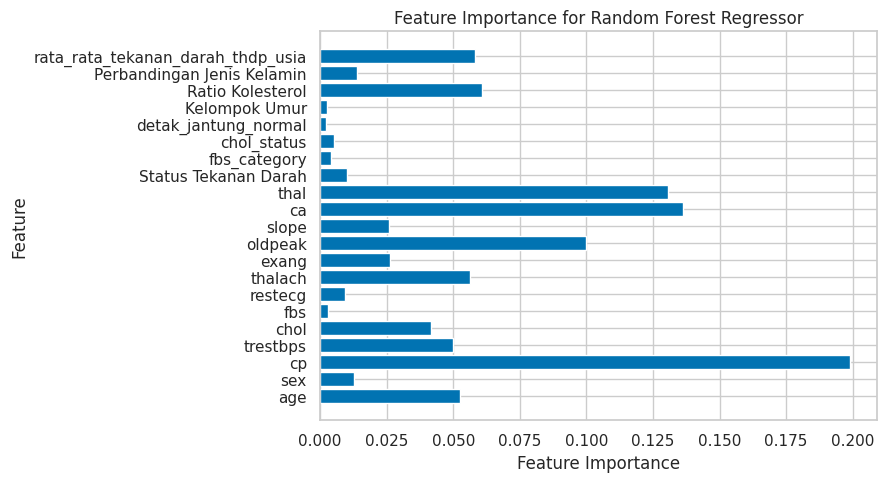

In [ ]:
# Create a bar chart of the feature importances
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor')
plt.show()